In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer

In [223]:
df = pd.read_json (r'./train.json')

In [224]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [225]:
df.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


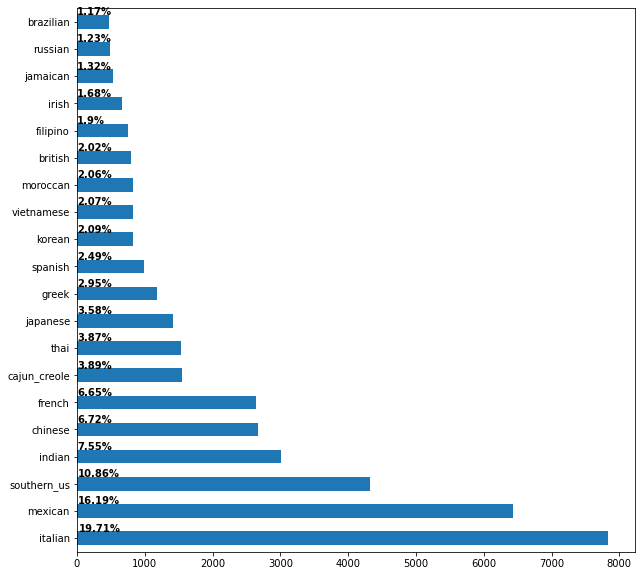

In [227]:
fig, ax = plt.subplots(figsize=(10,10))
per_vals = round(df["cuisine"].value_counts(normalize=True,ascending = False)*100, 2)
for i, v in enumerate(per_vals):
    ax.text(v + 3, i + .25, str(v)+"%", color='black', fontweight='bold')
df["cuisine"].value_counts(ascending = False).plot.barh(ax = ax)
plt.show()

<AxesSubplot:>

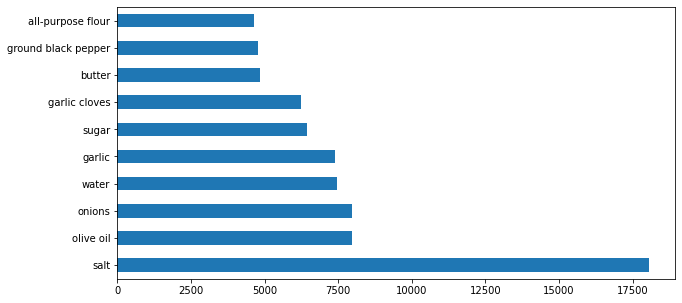

In [228]:
fig, ax = plt.subplots(figsize=(10,5))
ingredients_list = []
for ingr in df['ingredients']:
    ingredients_list.extend(ingr)
        
ingredients_series = pd.Series(ingredients_list)
ingredients_series.value_counts(ascending=False).head(10).plot.barh(ax = ax)

In [229]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Programmer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [230]:
import re
def process_string(x):
    x = [" ".join([WordNetLemmatizer().lemmatize(q) for q in p.split()]) for p in x] #Lemmatization
    x = list(map(lambda x: re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|powder|chopped|sliced','', x), x))
    x = list(map(lambda x: re.sub("[^a-zA-Z]", " ", x), x))   # To remove everything except a-z and A-Z
    x = " ".join(x)                                 # To make list element a string element 
    x = x.lower()
    return x

In [231]:
def preprocess_df(df):    
    df = df.drop('id',axis=1)
    df['ingredients'] = df['ingredients'].apply(process_string)
    
    return df

In [232]:
def tfidf_vectorizer(data):
    tfidf = TfidfVectorizer(stop_words='english',
                             ngram_range = ( 1 , 1 ),analyzer="word", 
                             max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)
    data = tfidf.fit_transform(data)
    return data, tfidf

In [233]:
preprocessed_df = preprocess_df(df)

In [234]:
preprocessed_df

,cuisine,ingredients
0,greek,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour pepper salt tomato black pepper ...
2,filipino,egg pepper salt mayonaise cooking oil green ch...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallot cornflour cayenne pepper ...
...,...,...
39769,irish,light brown sugar granulated sugar butter warm...
39770,italian,kraft zesty italian dressing purple onion broc...
39771,irish,egg citrus fruit raisin sourdough starter flou...
39772,chinese,boneless chicken skinless thigh garlic steame...


In [235]:
X = preprocessed_df['ingredients']
y = preprocessed_df['cuisine']

In [236]:
X, tfidf = tfidf_vectorizer(X)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=42)

In [238]:
LR =LogisticRegression(random_state=0, max_iter=2000)

In [239]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [240]:
train_pred= LR.predict(X_train)

print(accuracy_score(y_train, train_pred))
print(precision_score(y_train, train_pred, average='weighted'))

0.8197563973628338
0.8207158334765065


In [241]:
test_pred= LR.predict(X_test)

print(accuracy_score(y_test, test_pred))
print(precision_score(y_test, test_pred, average='weighted'))

0.7840623428858723
0.7845795531024182


In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

   brazilian       0.83      0.57      0.67        53
     british       0.80      0.41      0.54        88
cajun_creole       0.77      0.65      0.71       152
     chinese       0.77      0.90      0.83       247
    filipino       0.83      0.53      0.65        73
      french       0.62      0.68      0.65       277
       greek       0.74      0.72      0.73       124
      indian       0.90      0.88      0.89       297
       irish       0.61      0.38      0.47        87
     italian       0.80      0.91      0.85       773
    jamaican       0.91      0.62      0.74        50
    japanese       0.83      0.74      0.79       145
      korean       0.89      0.74      0.81        89
     mexican       0.90      0.94      0.92       637
    moroccan       0.83      0.66      0.74        89
     russian       0.67      0.42      0.51        48
 southern_us       0.68      0.80      0.73       415
     spanish       0.64    

In [243]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(y_test, test_pred)))

    0   1   2    3   4    5   6    7   8    9   10   11  12   13  14  15   16  \
0   30   0   0    1   1    1   0    0   1    2   0    0   0    9   0   0    7   
1    0  36   2    0   1   13   0    1   6    8   0    1   0    0   0   3   17   
2    0   1  99    0   0    6   0    0   0    6   1    0   0    5   0   3   28   
3    0   1   1  223   1    1   0    0   0    2   1    3   2    0   0   0    0   
4    4   0   2    9  39    1   0    1   1    2   0    2   0    2   0   0    7   
5    0   2   1    1   0  187   2    0   7   48   0    0   0    4   1   1   18   
6    0   0   0    0   0    2  89    1   0   23   0    0   0    1   2   0    2   
7    0   0   0    0   0    2   4  262   0    5   0    0   1    4   7   0    5   
8    0   0   2    1   0   16   1    0  33    4   1    0   0    3   0   0   24   
9    0   0   2    0   0   34  14    0   0  703   0    2   0    4   1   0    9   
10   1   1   0    0   0    1   0    2   0    0  31    1   0    5   0   0    8   
11   0   0   0   18   0    2

In [244]:
def normalize(X):
    mean = np.mean(X,axis=0);
    std = np.std(X,axis=0);
    std[std < 0.001] =1
    X_new = (X-mean)/std;
    return X_new, mean, std
def normalize_(X,mean,std):
    X_new = (X-mean)/std;
    return X_new
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new
def sigmoid(z):
    #z - вектор стовпець
    g = 1/(1+np.exp(z*-1));
    return g
def h(X, theta):
    # X - матриця
    # theta - вектор
    z = X.dot(theta)
    #print('z max: ',max(z))
    #print('z min: ',max(z))
    return sigmoid(z)
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    temp =h(X,theta);
    J = sum(-1*y*np.log(temp) - (1-y)*np.log(1-temp) )/m;#-
    return J
def derivative_theta(X, y, theta):
    m = X.shape[0];
    if m == 0:
        return None

    d_theta = X.T.dot(h(X,theta) -y)/m; #X and y
    
    return d_theta
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X,y,theta);
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta -= alpha* derivative_theta(X,y,theta);
        J = cost_function(X,y,theta);
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history
def Predict(X, mean, std):
    X_new =normalize_(X,mean,std);
    X_new = prepare_X(X_new);
    predict = h(X_new,theta);
    predict[predict > 0.5]=1;
    predict[predict <= 0.5]=0;
    return predict

In [245]:
y_new = y.apply(lambda x:1 if (x == 'chinese') else 0 );

In [246]:
y_new = y_new.values

In [247]:
X_new = X.toarray()

In [248]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_new, y_new, test_size=0.1, random_state=42)

In [249]:
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(35796, 2793), y=(35796,)
Test set: X=(3978, 2793), y=(3978,)


In [250]:
X_new,mean,std = normalize(X_train)

In [251]:
X_new = prepare_X(X_new)

In [252]:
theta = np.zeros((X_new.shape[1], 1))

In [253]:
alpha =0.05
max_iter =100
eps =1e-7

In [254]:
new_theta, Js = gradient_descent(X_new, y_train.reshape((X_train.shape[0], 1)), theta, alpha, eps, max_iter, False)

In [255]:
y_test_pred =Predict(X_test,mean,std)

In [256]:
accuracy_score(y_test, y_test_pred)

0.9648064353946707

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3731
           1       0.66      0.90      0.76       247

    accuracy                           0.96      3978
   macro avg       0.83      0.94      0.87      3978
weighted avg       0.97      0.96      0.97      3978



In [258]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))

      0    1
0  3615  116
1    24  223
